# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')

# Import Dataset


In [2]:
dataset=pd.read_csv('Tata-steel.csv')
dataset.head(6)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,03-Jul-15,308.00,308.00,299.75,300.95,302.708180,499554,6430,151219082,118810.0,23.78,8.25,-7.05
1,06-Jul-15,294.90,299.60,292.30,298.75,295.646338,663354,9184,196118181,117663.0,17.74,7.30,3.85
2,07-Jul-15,300.75,303.25,296.00,297.45,299.477691,877207,8581,262703927,211277.0,24.09,7.25,-3.30
3,08-Jul-15,293.80,294.00,282.00,283.40,286.875105,1446189,20272,414875621,563505.0,38.96,12.00,-10.40
4,09-Jul-15,285.20,287.25,279.60,280.55,282.860975,974983,13946,275784642,330248.0,33.87,7.65,-4.65
5,10-Jul-15,282.00,284.60,279.00,280.95,281.406322,702436,9268,197669931,135447.0,19.28,5.60,-1.05


# Number Of Trading Days

In [3]:
dataset.shape

(1485, 13)

# Visualize The Close Price Data


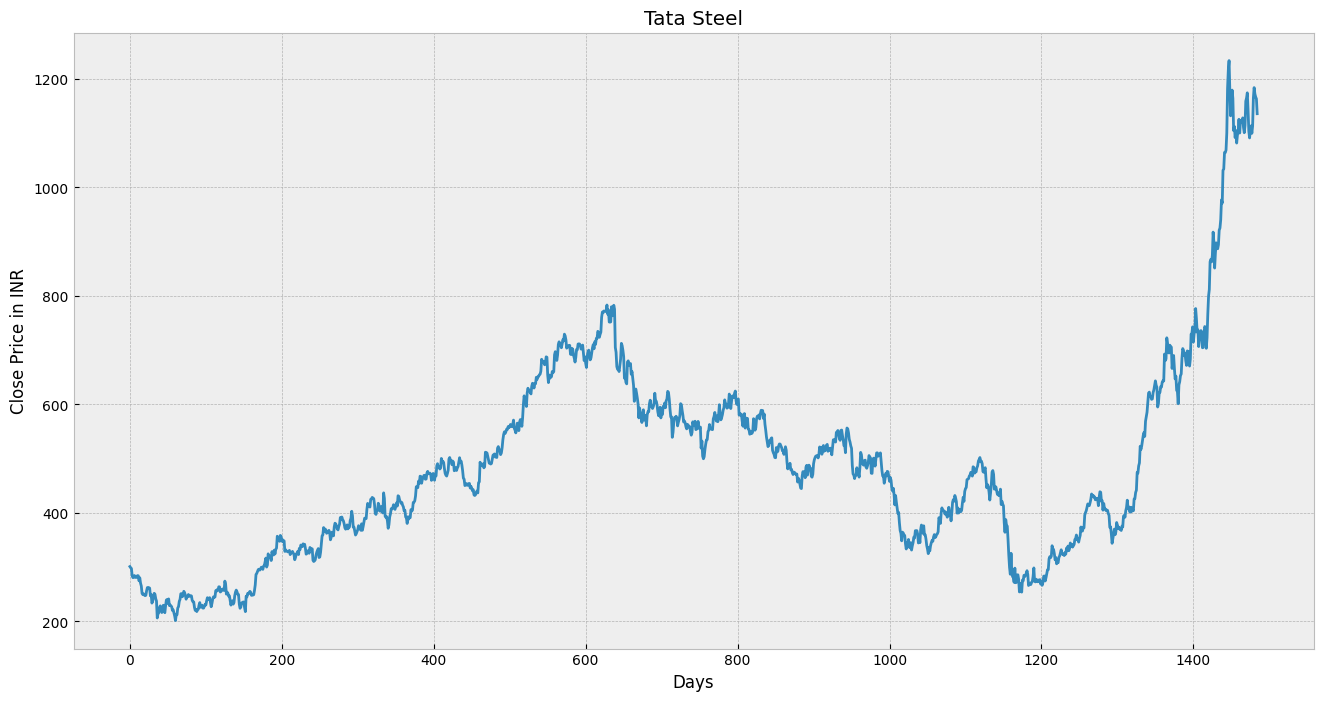

In [4]:
plt.figure(figsize=(16,8))
plt.title('Tata Steel')
plt.xlabel('Days')
plt.ylabel('Close Price in INR')
plt.plot(dataset['Close Price'])
plt.show()

# Get The Close Price

In [5]:
dataset=dataset[['Close Price']]
dataset.head(4)

,Close Price
0,300.95
1,298.75
2,297.45
3,283.40


# Predicting For 'x' Days In Future

In [6]:
future_days=25
dataset['Prediction']=dataset[['Close Price']].shift(-future_days)
dataset.tail(4)

<ipython-input-6-9b8e8ebf35b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Prediction']=dataset[['Close Price']].shift(-future_days)


,Close Price,Prediction
1481,1172.45,NaN
1482,1166.85,NaN
1483,1163.35,NaN
1484,1135.95,NaN


# Creating Feature Dataset(X) And Removing last 'x' rows/days

In [7]:
X=np.array(dataset.drop(['Prediction'],1))[:-future_days]
print(X)

[[ 300.95]
 [ 298.75]
 [ 297.45]
 ...
 [1081.85]
 [1096.6 ]
 [1103.75]]


<ipython-input-7-665f2d3b62cb>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=np.array(dataset.drop(['Prediction'],1))[:-future_days]


# Creating The Target Dataset

In [8]:
y=np.array(dataset['Prediction'])[:-future_days]
print(y)

[ 262.05  261.15  246.9  ... 1166.85 1163.35 1135.95]


# Splitting Data Into Training and Test Set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Creating the Models

In [10]:
#Creating the random forest regressor model
from sklearn.ensemble import RandomForestRegressor
ran = RandomForestRegressor(n_estimators = 10, random_state = 0)
ran.fit(X, y)
#Creating the linear regression model
from sklearn.linear_model import LinearRegression
li = LinearRegression()
li.fit(X_train, y_train)

LinearRegression()

# Get The Last 'x' Rows Of Feature Dataset

In [11]:
x_future=dataset.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

<ipython-input-11-e3b29c985b4c>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future=dataset.drop(['Prediction'],1)[:-future_days]


array([[ 925.2 ],
       [ 940.4 ],
       [ 977.15],
       [ 971.05],
       [1031.6 ],
       [1033.95],
       [1064.55],
       [1064.05],
       [1068.95],
       [1100.55],
       [1182.35],
       [1216.55],
       [1233.9 ],
       [1178.65],
       [1132.1 ],
       [1150.65],
       [1179.5 ],
       [1164.3 ],
       [1104.85],
       [1112.5 ],
       [1091.85],
       [1104.9 ],
       [1081.85],
       [1096.6 ],
       [1103.75]])

# Show The Predction Of Models

In [12]:
#Prediction Of Forest Model
ran_prediction=ran.predict(x_future)
print(ran_prediction)
#Prediction of Linear Regression Model
li_prediction=li.predict(x_future)
print(li_prediction)

[1139.615 1118.36  1122.81  1122.07  1118.    1123.04  1108.43  1106.51
 1113.185 1147.5   1143.34  1155.44  1148.98  1104.64  1092.72  1100.95
 1112.56  1101.71  1139.2   1159.9   1173.03  1162.88  1166.43  1162.25
 1135.06 ]
[ 962.48957903  978.43402653 1016.98392426 1010.58516573 1074.10071152
 1076.56580702 1108.66449738 1108.14000898 1113.27999534 1146.42766251
 1232.2339655  1268.10897237 1286.30872001 1228.3527513  1179.52288084
 1198.98140065 1229.24438159 1213.29993409 1150.93826279 1158.96293538
 1137.30156427 1150.99071163 1126.81179618 1142.28420411 1149.7843883 ]


# Visualize The Data Of Random Forest Regressor

<ipython-input-13-554c62fc6c02>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction']=Prediction


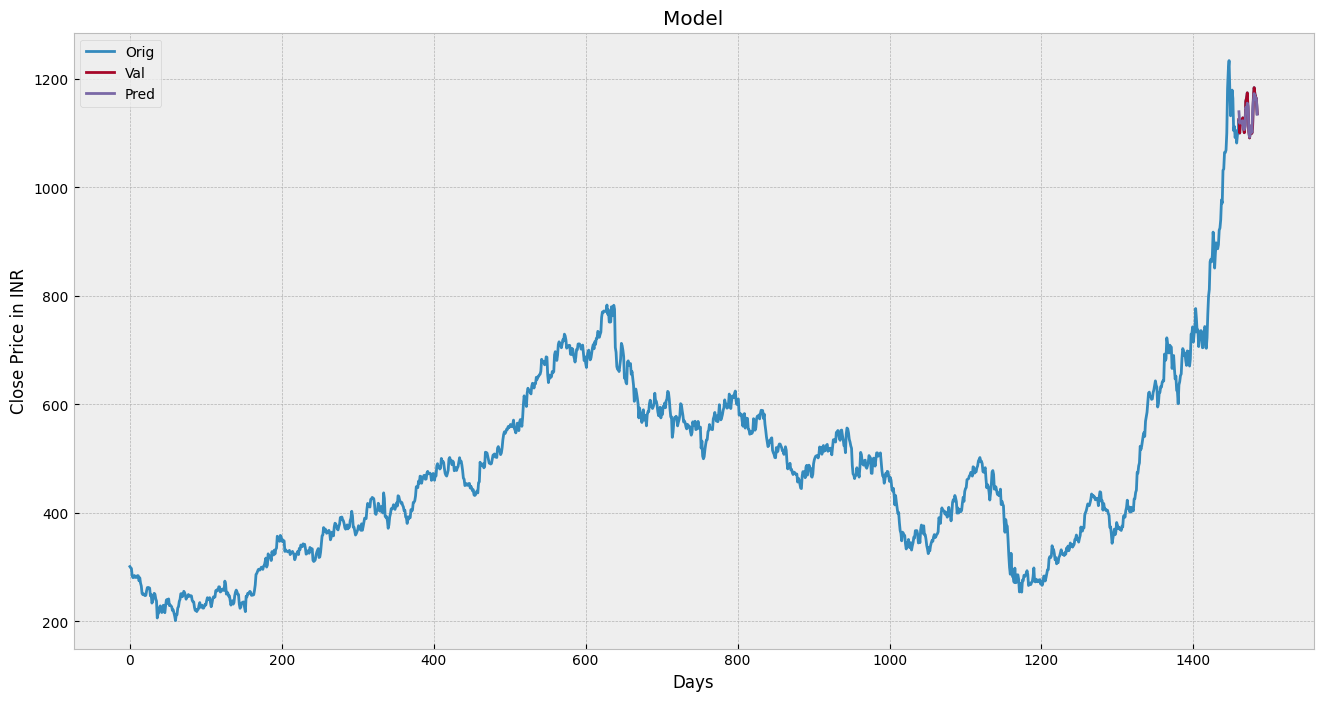

In [13]:
Prediction=ran_prediction

valid=dataset[X.shape[0]:]
valid['Prediction']=Prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price in INR')
plt.plot(dataset['Close Price'])
plt.plot(valid[['Close Price','Prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()

# Visualize The Data Of Linear Regression

<ipython-input-14-02f9ea1887a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction']=Prediction


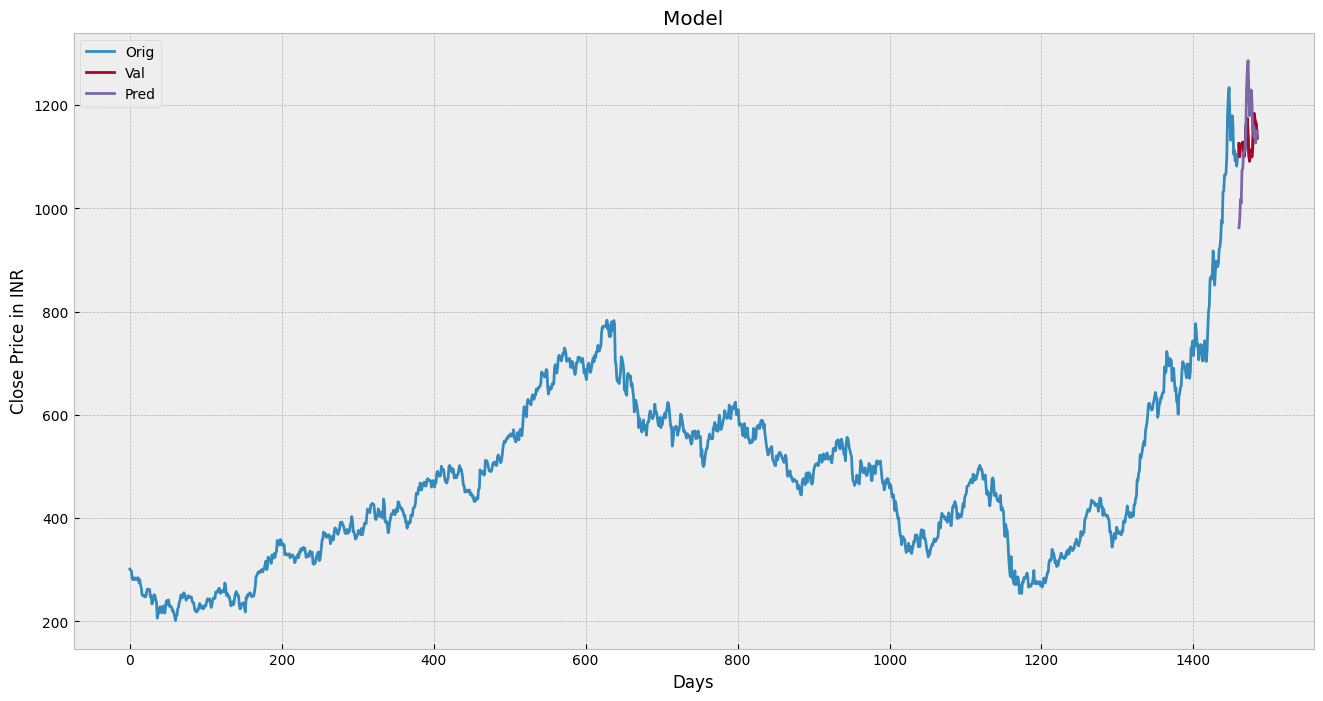

In [14]:
Prediction=li_prediction

valid=dataset[X.shape[0]:]
valid['Prediction']=Prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price in INR')
plt.plot(dataset['Close Price'])
plt.plot(valid[['Close Price','Prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()